In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
df = pd.read_csv("../Data/citibike_2022_with_weather_sample.csv")
df.head()


C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\102071549.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/citibike_2022_with_weather_sample.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,C31A06A81423A14C,classic_bike,2022-01-18 07:40:25.346,2022-01-18 07:43:35.441,W 26 St & 8 Ave,6297.02,10 Ave & W 28 St,6459.04,40.747348,-73.997236,40.750664,-74.001768,member,2022-01-18,1.8
1,6104B30E6CC08F21,classic_bike,2022-01-18 20:13:23.444,2022-01-18 20:57:37.652,Jay St & York St,4895.09,Clark St & Henry St,4789.03,40.701403,-73.986727,40.697601,-73.993446,member,2022-01-18,1.8
2,127F7DF7F787F370,classic_bike,2022-01-01 02:26:22.776,2022-01-01 02:46:12.503,Greenwich St & Perry St,5922.04,E 13 St & Avenue A,5779.09,40.734980,-74.006970,40.729667,-73.980680,casual,2022-01-01,11.6
3,FF12FDCC260D47C3,classic_bike,2022-01-06 18:30:28.542,2022-01-06 18:44:35.763,Lexington Ave & E 36 St,6313.1,W 26 St & 10 Ave,6382.05,40.747574,-73.978801,40.749718,-74.002950,member,2022-01-06,4.9
4,D8402474AF50D5F1,classic_bike,2022-01-27 18:29:15.544,2022-01-27 18:30:52.077,31 St & 21 Ave,7202.07,31 St & Ditmars Blvd,7144.02,40.778130,-73.908420,40.776168,-73.910485,member,2022-01-27,-4.2


In [ ]:
# Set one global theme + one palette for ALL plots
sns.set_theme(style="whitegrid", palette="crest")

# Display settings
%matplotlib inline

# Ignore warnings
import warnings

In [ ]:
# Check columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

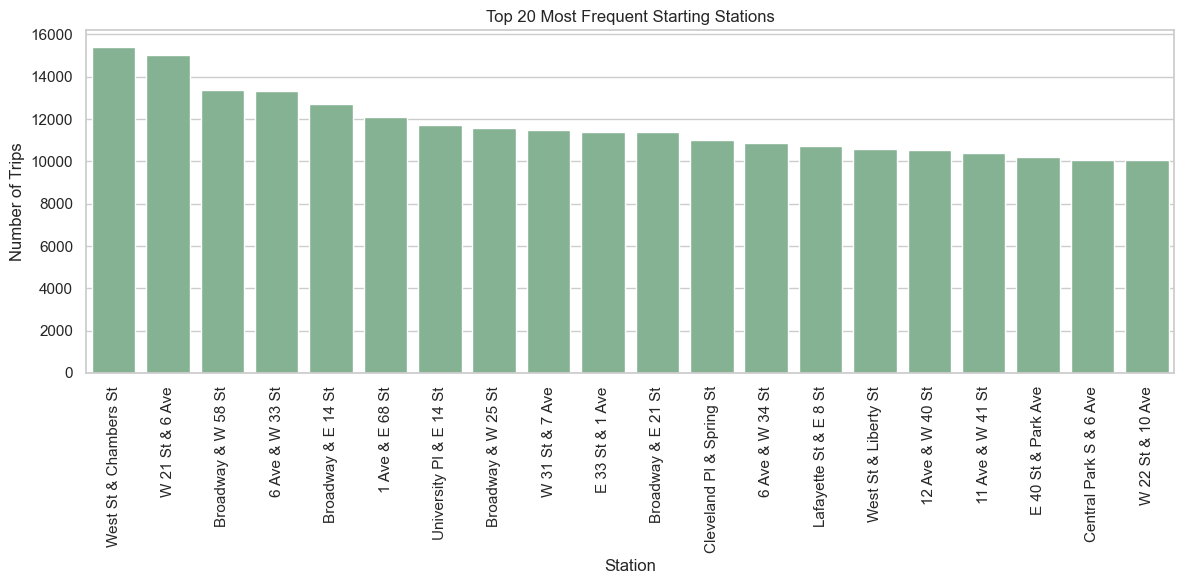

In [8]:
# Get top 20 starting stations
top20 = df['start_station_name'].value_counts().head(20).reset_index()
top20.columns = ['station', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top20, x='station', y='count')
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Starting Stations")
plt.xlabel("Station")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

The global palette does not contain enough distinct colors for 20 categories.
Since the bar chart represents 20 different stations, I temporarily switched to the “tab20” palette, which provides 20 clearly separated colors.

C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\2748661177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


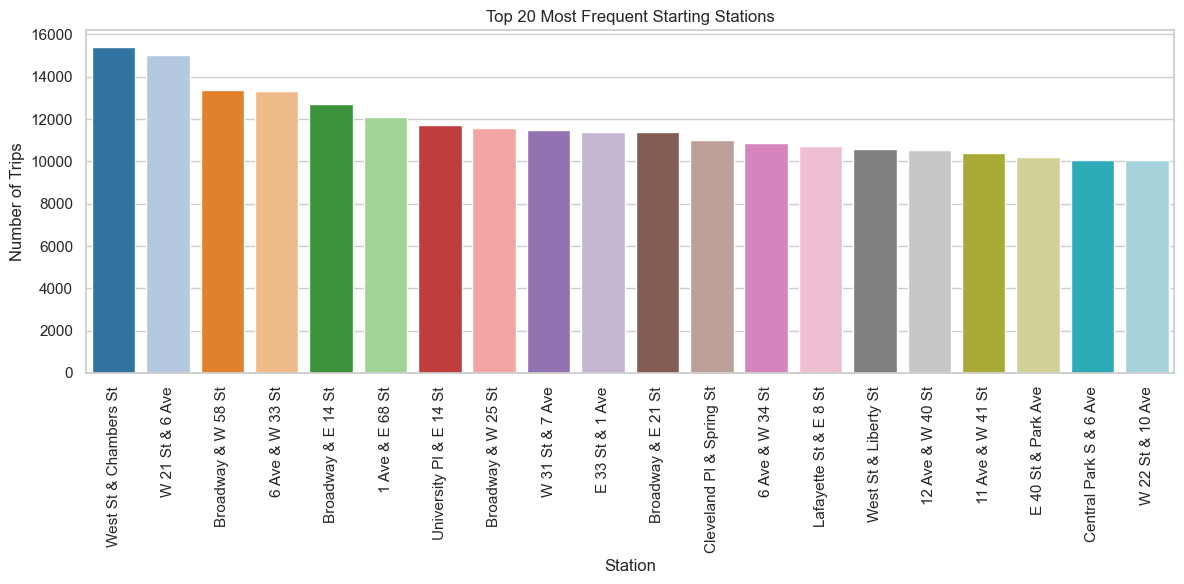

In [ ]:
# Temporaray palette for this plot

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top20,
    x='station',
    y='count',
    palette='tab20'   
)

plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Starting Stations")
plt.xlabel("Station")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


In [ ]:
# Filter data for the year 2022
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df_2022 = df[df['date'].dt.year == 2022]

In [ ]:
# Aggregate data to daily level
daily = df_2022.groupby('date').agg(
    rides=('ride_id', 'count'),
    avg_temp=('avgTemp', 'mean')
).reset_index()

In [ ]:
# Verify that only 2022 data is present
df_2022['date'].dt.year.unique()

array([2022], dtype=int32)

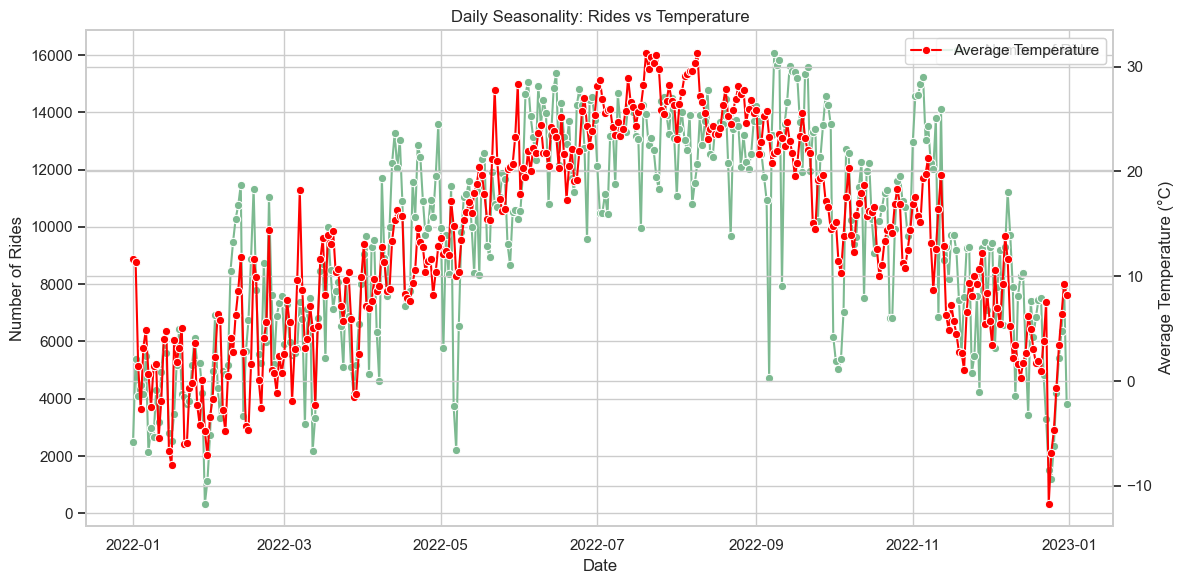

In [ ]:
# Dual-axis line chart: daily rides vs avg temperature

fig, ax1 = plt.subplots(figsize=(12, 6))

# First line: number of rides (uses global theme + palette)
sns.lineplot(
    data=daily,
    x='date',
    y='rides',
    marker='o',
    ax=ax1,
    label='Number of Rides'
)

ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Rides")
ax1.tick_params(axis='y')

# Second axis for temperature
ax2 = ax1.twinx()

# Here we override the color to make sure it is clearly distinguishable
sns.lineplot(
    data=daily,
    x='date',
    y='avg_temp',
    marker='o',
    color='red',      # Override color for clarity
    ax=ax2,
    label='Average Temperature'
)

ax2.set_ylabel("Average Temperature (°C)")
ax2.tick_params(axis='y')

plt.title("Daily Seasonality: Rides vs Temperature")
fig.tight_layout()
plt.show()

In [15]:
# Convert to datetime if needed
df_2022['started_at'] = pd.to_datetime(df_2022['started_at'])
df_2022['ended_at'] = pd.to_datetime(df_2022['ended_at'])

# Create ride duration in minutes
df_2022['ride_duration'] = (df_2022['ended_at'] - df_2022['started_at']).dt.total_seconds() / 60



C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\3394782286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['started_at'] = pd.to_datetime(df_2022['started_at'])
C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\3394782286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['ended_at'] = pd.to_datetime(df_2022['ended_at'])
C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\3394782286.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\4008151862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


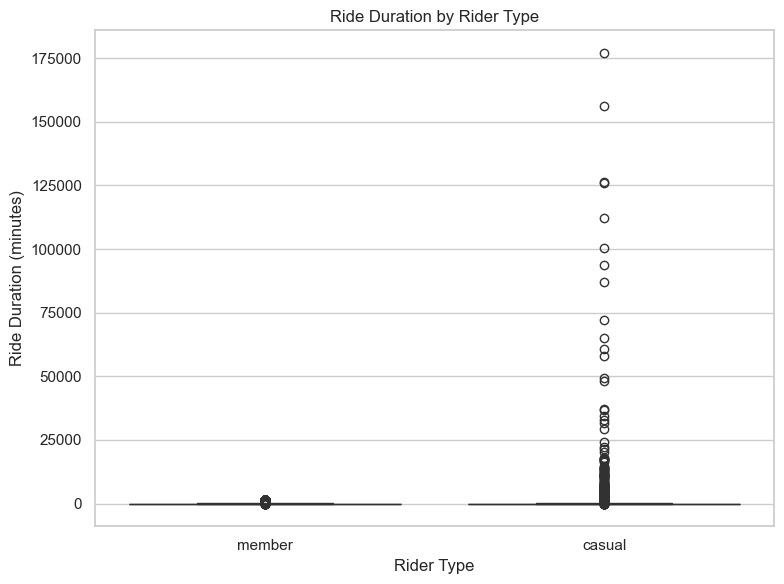

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_2022,
    x='member_casual',
    y='ride_duration',
    palette='crest'   # koristi globalnu temu, pa možeš i izostaviti
)
plt.title("Ride Duration by Rider Type")
plt.xlabel("Rider Type")
plt.ylabel("Ride Duration (minutes)")
plt.tight_layout()
plt.show()


The box plot shows a difference in ride duration between casual riders and members. Casual riders tend to have longer trips overall, as indicated by their higher median and wider interquartile range. Members show shorter and more consistent ride durations, suggesting they use the bikes mainly for commuting or short, routine trips. The casual group also has many more outliers, which means that casual riders frequently take unusually long rides. Overall, the plot shows that members and casual riders have very different riding habits.

In [17]:
# Day of week column
df_2022['day_of_week'] = df_2022['date'].dt.day_name()

C:\Users\mais1\AppData\Local\Temp\ipykernel_21544\397491138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['day_of_week'] = df_2022['date'].dt.day_name()


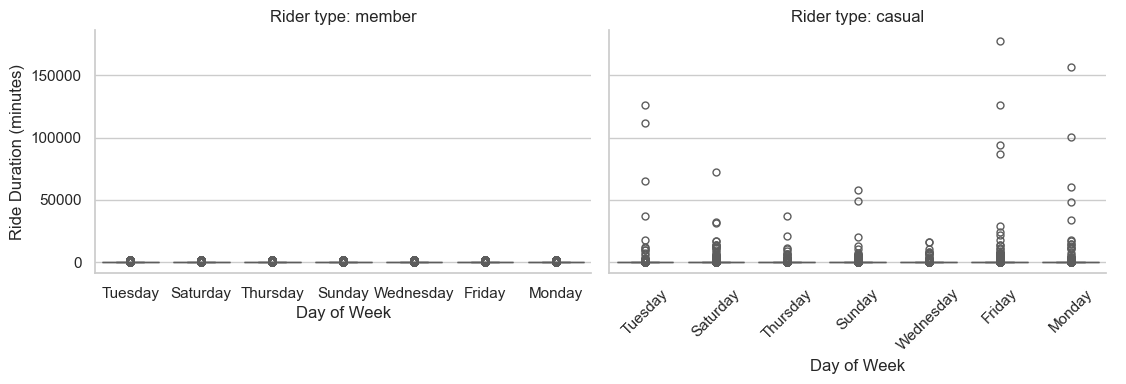

In [18]:
g = sns.catplot(
    data=df_2022,
    x='day_of_week',
    y='ride_duration',
    col='member_casual',
    kind='box',
    height=4,
    aspect=1.4
)

g.set_axis_labels("Day of Week", "Ride Duration (minutes)")
g.set_titles("Rider type: {col_name}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The FacetGrid plot shows how ride duration varies across the days of the week for members and casual riders. Casual riders have longer and more variable rides, especially on weekends, while members show shorter and more consistent ride durations across most weekdays. This suggests that members mainly use the service for regular commuting, whereas casual riders are more likely to use it for longer and relaxed trips.